# Нелинейные уравнения

## Импорт библиотек

In [64]:
import numpy as np
import matplotlib.pyplot as plt

## Задание системы нелинейных уравнений


In [65]:
def f1(x, y):
    return np.tan(y - x) + x * y - 0.3

def f2(x, y):
    return x ** 2 + y ** 2 - 1.5

def F(x, y):
    return np.array([f1(x, y), f2(x, y)])

# Derivatives
def f1x(x, y):
    return -1.0 * 1 / (np.cos(y - x) ** 2) + y

def f1y(x, y):
    return 1.0 / (np.cos(y - x) ** 2) + x

def f2x(x, y):
    return 2 * x

def f2y(x, y):
    return 2 * y

# Построение графиков функций


/var/folders/c_/8jj_5sxn755_xm_y_vqt0gl80000gn/T/ipykernel_7431/1476484818.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(X, Y, eq(X, Y), 8, colors=color, linewidth=0.5)


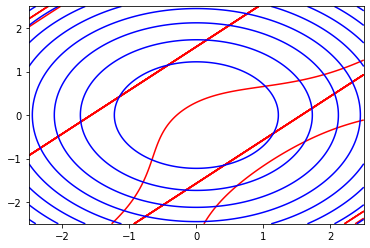

In [85]:
points = 2000
x = np.linspace(-2.5, 2.5, points)
y = np.linspace(-2.5, 2.5, points)

def plot_equation(eq, color):
    
    X, Y = np.meshgrid(x, y)

    plt.contourf(X, Y, eq(X, Y), 8, alpha = 0)
    plt.contour(X, Y, eq(X, Y), 8, colors=color, linewidth=0.5)
    
plot_equation(f1, 'red')
plot_equation(f2, 'blue')

## Построение метода Ньютона

In [82]:
precision = 1e-6
# Ищем решение на отрезке [4, 5], например
x_0 = 4
y_0 = 5
u_0 = np.array([x_0, y_0])
I = np.array([[f1x(x_0, y_0), f1y(x_0, y_0)],
             [f2x(x_0, y_0), f2y(x_0, y_0)]])

I_rev = np.linalg.inv(I)


def step_info(k, u_prev, u_curr):
    print(f'Info on {k} iteration:')
    print(f'Iteration: {k}')
    print(f'u[{k - 1}]: ')
    print(u_prev)
    print(f'u[{k}]: ')
    print(u_curr)
    print('Error:')
    print(u_curr - u_prev)
    print('\n\n\n')
    

def norm(x):
    return abs(np.max(x))

def solve_newton(u_prev):
    k = 0
    u_curr = u_prev - I_rev.dot(F(u_prev[0], u_prev[1]))
    error = u_curr  - u_prev
        
    while(norm(error) > precision):
        step_info(k, u_prev, u_curr)
        u_prev = u_curr
        u_curr = u_prev - I_rev.dot(F(u_prev[0], u_prev[1]))
        error = u_curr - u_prev
        k = k + 1
    
solve_newton(u_0)

Info on 0 iteration:
Iteration: 0
u[-1]: 
[4 5]
u[0]: 
[2.15082137 2.5293429 ]
Error:
[-1.84917863 -2.4706571 ]




Info on 1 iteration:
Iteration: 1
u[0]: 
[2.15082137 2.5293429 ]
u[1]: 
[1.79948556 1.85805075]
Error:
[-0.35133582 -0.67129216]




Info on 2 iteration:
Iteration: 2
u[1]: 
[1.79948556 1.85805075]
u[2]: 
[1.62723181 1.47680366]
Error:
[-0.17225374 -0.38124709]




Info on 3 iteration:
Iteration: 3
u[2]: 
[1.62723181 1.47680366]
u[3]: 
[1.50805867 1.23925893]
Error:
[-0.11917314 -0.23754473]




Info on 4 iteration:
Iteration: 4
u[3]: 
[1.50805867 1.23925893]
u[4]: 
[1.41142671 1.08556413]
Error:
[-0.09663196 -0.1536948 ]




Info on 5 iteration:
Iteration: 5
u[4]: 
[1.41142671 1.08556413]
u[5]: 
[1.33213031 0.98194377]
Error:
[-0.0792964  -0.10362037]




Info on 6 iteration:
Iteration: 6
u[5]: 
[1.33213031 0.98194377]
u[6]: 
[1.26867887 0.90882644]
Error:
[-0.06345144 -0.07311732]




Info on 7 iteration:
Iteration: 7
u[6]: 
[1.26867887 0.90882644]
u[7]: 
[1.21877171 0.

Процесс сошелся за 57 итераций с заданной точностью. Проверим, теперь, результат работы для другого отрезка локализации

In [84]:
# Ищем решение на отрезке [8, 1]
x_0 = 9
y_0 = 1
u_0 = np.array([x_0, y_0])
I = np.array([[f1x(x_0, y_0), f1y(x_0, y_0)],
             [f2x(x_0, y_0), f2y(x_0, y_0)]])

I_rev = np.linalg.inv(I)
solve_newton(u_0)

Info on 0 iteration:
Iteration: 0
u[-1]: 
[9 1]
u[0]: 
[ 4.93019181 -2.62172625]
Error:
[-4.06980819 -3.62172625]




Info on 1 iteration:
Iteration: 1
u[0]: 
[ 4.93019181 -2.62172625]
u[1]: 
[ 3.38955923 -3.59615298]
Error:
[-1.54063257 -0.97442673]




Info on 2 iteration:
Iteration: 2
u[1]: 
[ 3.38955923 -3.59615298]
u[2]: 
[ 2.1985956  -4.33819433]
Error:
[-1.19096363 -0.74204136]




Info on 3 iteration:
Iteration: 3
u[2]: 
[ 2.1985956  -4.33819433]
u[3]: 
[ 1.05257433 -5.10087924]
Error:
[-1.14602127 -0.76268491]




Info on 4 iteration:
Iteration: 4
u[3]: 
[ 1.05257433 -5.10087924]
u[4]: 
[-0.26199447 -6.08320086]
Error:
[-1.31456881 -0.98232162]




Info on 5 iteration:
Iteration: 5
u[4]: 
[-0.26199447 -6.08320086]
u[5]: 
[-2.06965124 -7.60127684]
Error:
[-1.80765677 -1.51807599]




Info on 6 iteration:
Iteration: 6
u[5]: 
[-2.06965124 -7.60127684]
u[6]: 
[ -5.12298627 -10.40269451]
Error:
[-3.05333503 -2.80141766]




Info on 7 iteration:
Iteration: 7
u[6]: 
[ -5.12298627 -10

/var/folders/c_/8jj_5sxn755_xm_y_vqt0gl80000gn/T/ipykernel_7431/1525197387.py:2: RuntimeWarning: overflow encountered in double_scalars
  return np.tan(y - x) + x * y - 0.3
/var/folders/c_/8jj_5sxn755_xm_y_vqt0gl80000gn/T/ipykernel_7431/1525197387.py:5: RuntimeWarning: overflow encountered in double_scalars
  return x ** 2 + y ** 2 - 1.5


Тут вообще не сошелся...